<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Sameer_chapter_5_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machines**

In [162]:
import sys

assert sys.version_info >= (3, 7)
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [163]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

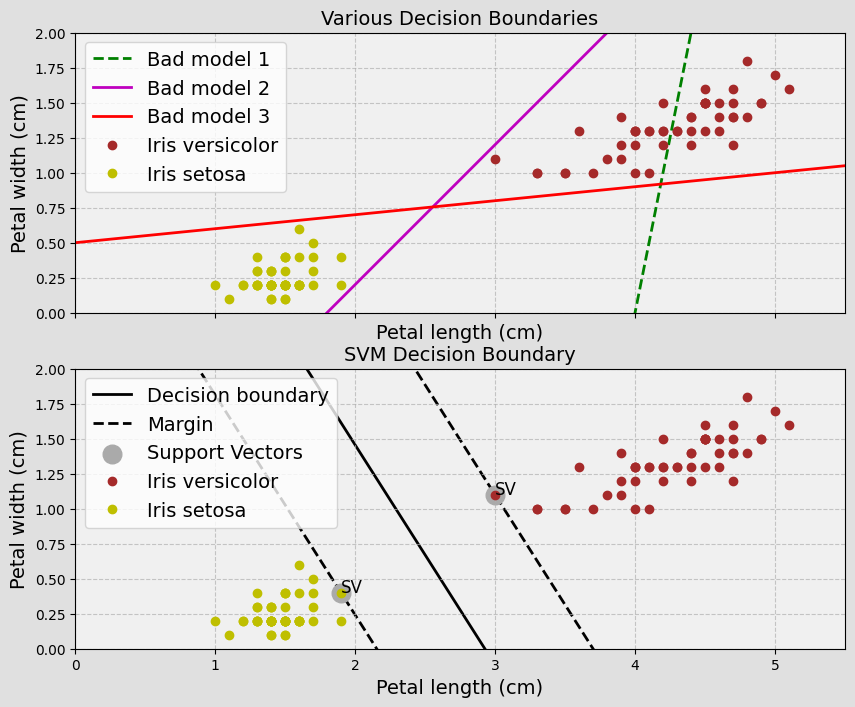

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filter the dataset for Setosa and Versicolor
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Train the SVM classifier
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Create bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2, label="Decision boundary")
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2, label="Margin")
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1, label="Support Vectors")

fig, axes = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)
fig.patch.set_facecolor('#e0e0e0')

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2, label="Bad model 1")
plt.plot(x0, pred_2, "m-", linewidth=2, label="Bad model 2")
plt.plot(x0, pred_3, "r-", linewidth=2, label="Bad model 3")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "o", color="brown", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend(loc="upper left")
plt.title("Various Decision Boundaries")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid(True, linestyle='--', alpha=0.7)
axes[0].set_facecolor('#f0f0f0')

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "o", color="brown", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("SVM Decision Boundary")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid(True, linestyle='--', alpha=0.7)
axes[1].set_facecolor('#f0f0f0')
plt.legend(loc="upper left")

# Annotate the support vectors
for sv in svm_clf.support_vectors_:
    plt.annotate("SV", (sv[0], sv[1]), fontsize=12, color='black')

plt.savefig("alternative_visualization_large_margin_classification_plot_vertical.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


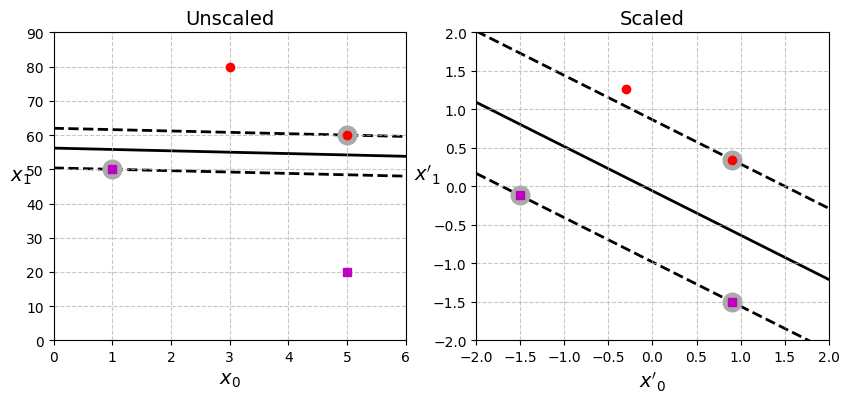

In [165]:
# Define the plot_svc_decision_boundary function
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2, label="Decision boundary")
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2, label="Margin")
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1, label="Support Vectors")

# Original data
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Train SVM classifier on original data
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

# Train SVM classifier on scaled data
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

# Plotting
plt.figure(figsize=(10, 4))

# Plot original data
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "ro")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid(True, linestyle='--', alpha=0.7)

# Plot scaled data
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "ro")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig("sensitivity_to_feature_scales_plot.png")
plt.show()


## Soft Margin Classification

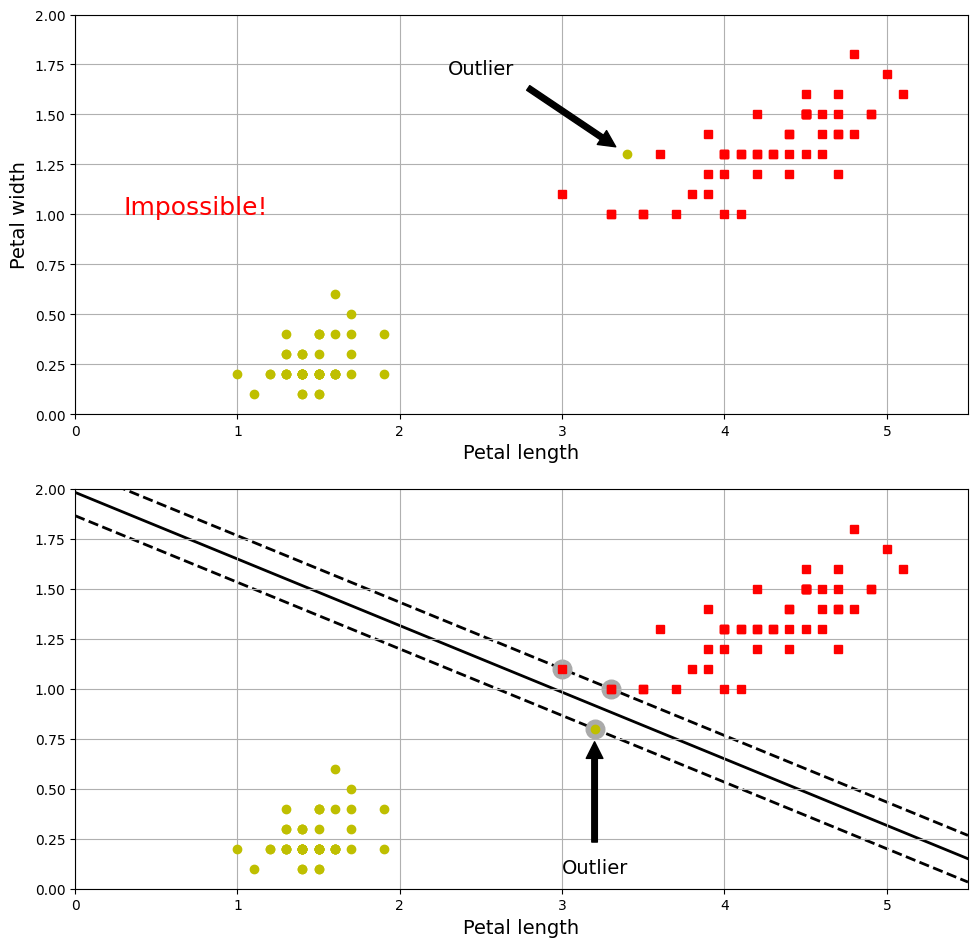

In [166]:
# extra code – this cell generates and saves Figure 5–3

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(nrows=2, figsize=(10, 9.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "rs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "rs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

In [167]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [168]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [169]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

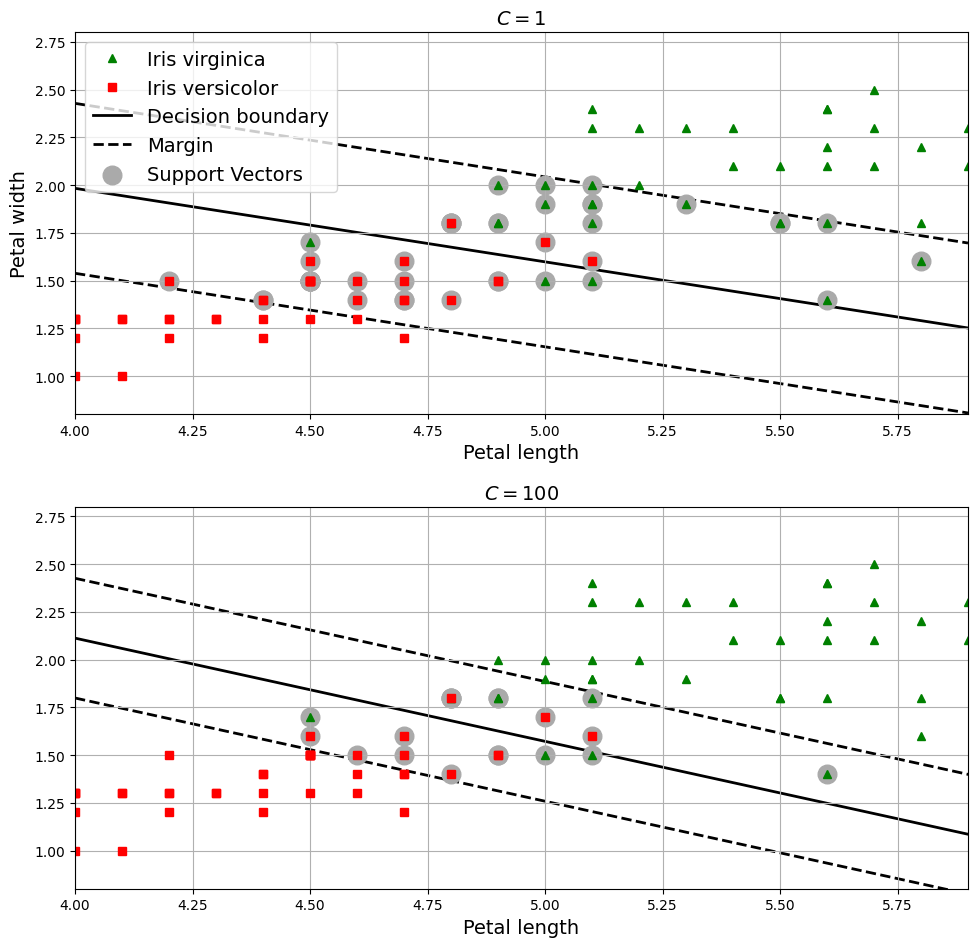

In [170]:
# extra code – this cell generates and saves Figure 5–4

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(nrows=2, figsize=(10, 9.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

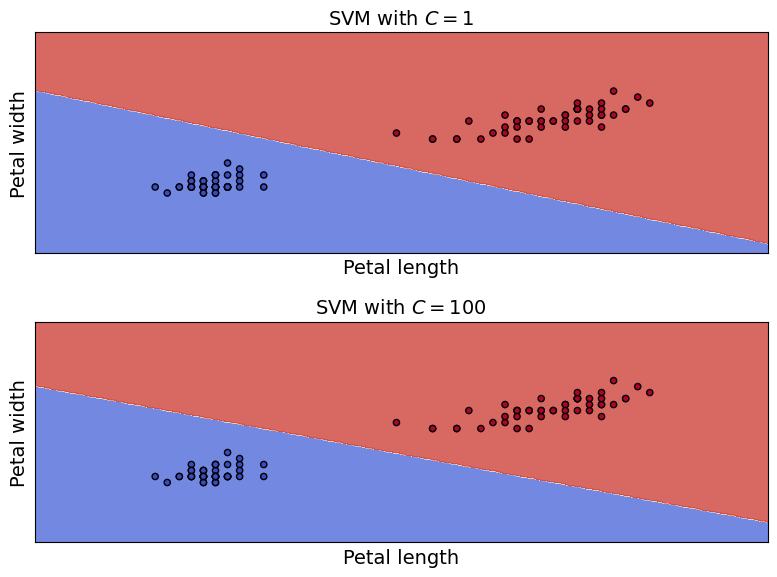

In [171]:
# Load the iris dataset
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filter the dataset for Setosa and Versicolor
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Create a grid to evaluate model
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Plot decision boundary and margins
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Scale the data
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Create a meshgrid
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharey=True)

# Plot SVM with C=1
ax1 = axes[0]
plot_contours(ax1, scaled_svm_clf1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title(f"SVM with $C = {svm_clf1.C}$")

# Plot SVM with C=100
ax2 = axes[1]
plot_contours(ax2, scaled_svm_clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title(f"SVM with $C = {svm_clf2.C}$")

plt.tight_layout()
plt.savefig("heatmap_regularization_plot.png")
plt.show()


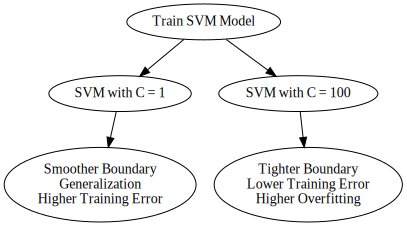

In [172]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment='SVM Model Training')

# Add nodes
dot.node('A', 'Train SVM Model')
dot.node('B', 'SVM with C = 1')
dot.node('C', 'SVM with C = 100')
dot.node('D', 'Smoother Boundary\nGeneralization\nHigher Training Error')
dot.node('E', 'Tighter Boundary\nLower Training Error\nHigher Overfitting')

# Add edges
dot.edges(['AB', 'AC'])
dot.edge('B', 'D')
dot.edge('C', 'E')

# Render and display the graph
dot.render('svm_flowchart', format='png', view=True)



# Display the graph
display(dot)

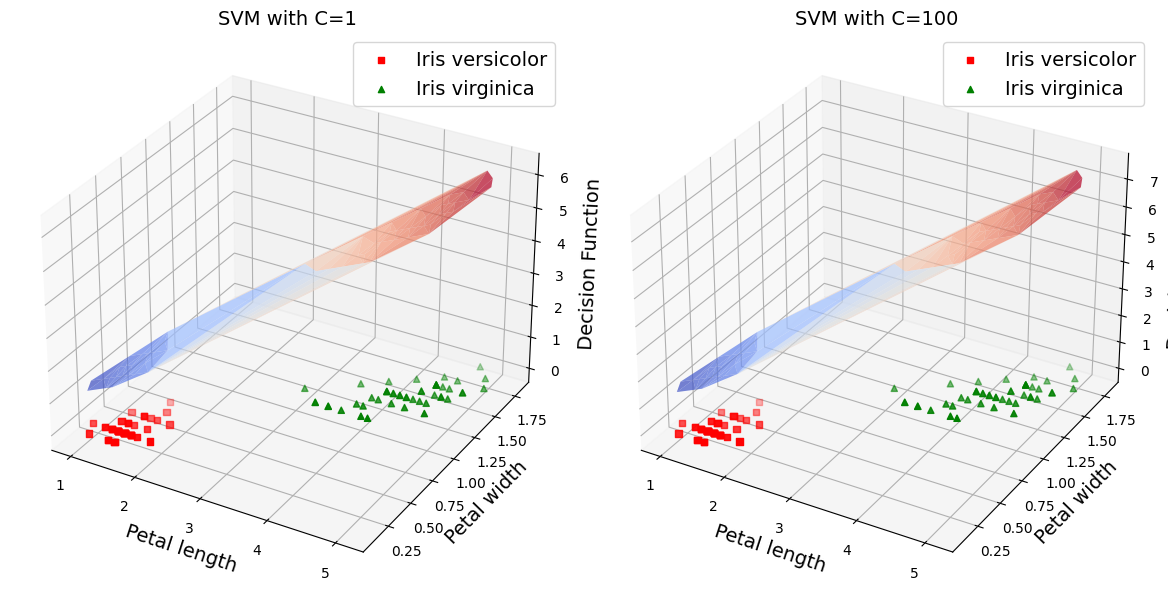

In [173]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot for SVM results
fig = plt.figure(figsize=(12, 6))

# Original SVM with C=1
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r', marker='s', label="Iris versicolor")
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='g', marker='^', label="Iris virginica")
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_zlabel('Decision Function')
decision_function = svm_clf1.decision_function(X)
ax.plot_trisurf(X[:, 0], X[:, 1], decision_function, cmap=plt.cm.coolwarm, alpha=0.7)
ax.set_title("SVM with C=1")
ax.legend()

# SVM with C=100
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r', marker='s', label="Iris versicolor")
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='g', marker='^', label="Iris virginica")
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_zlabel('Decision Function')
decision_function = svm_clf2.decision_function(X)
ax.plot_trisurf(X[:, 0], X[:, 1], decision_function, cmap=plt.cm.coolwarm, alpha=0.7)
ax.set_title("SVM with C=100")
ax.legend()

plt.tight_layout()
plt.savefig("3D_regularization_plot.png")
plt.show()


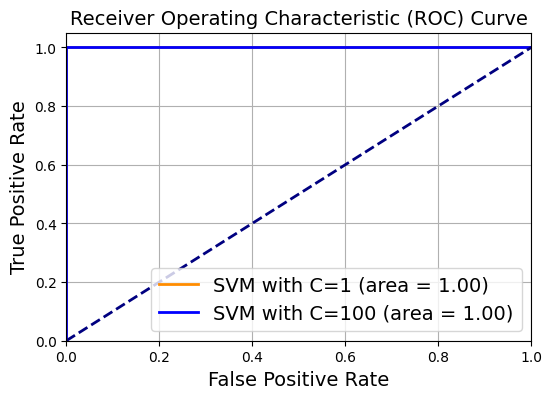

In [174]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the models
svm_clf1.fit(X_train, y_train)
svm_clf2.fit(X_train, y_train)

# Get the decision function scores
y_score1 = svm_clf1.decision_function(X_test)
y_score2 = svm_clf2.decision_function(X_test)

# Compute ROC curve and ROC area
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(6, 4))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'SVM with C=1 (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'SVM with C=100 (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve_plot.png")
plt.show()


# Nonlinear SVM Classification

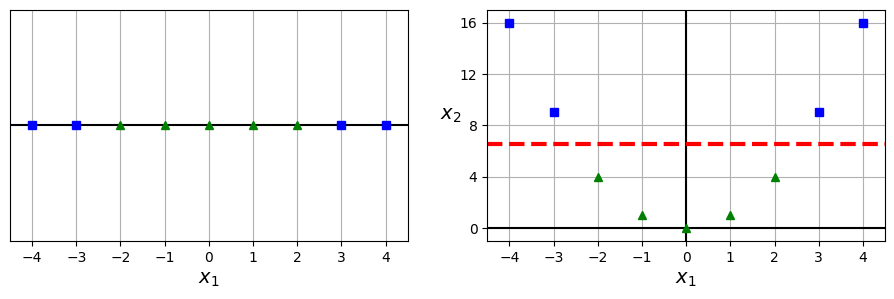

In [175]:
# extra code – this cell generates and saves Figure 5–5

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

In [176]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

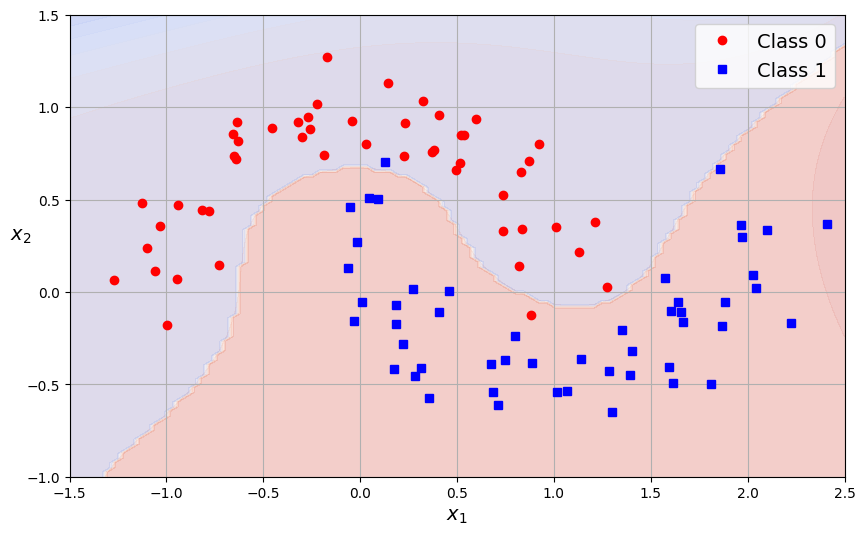

In [178]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial SVM classifier
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
polynomial_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap="coolwarm", alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap="coolwarm", alpha=0.1)

plt.figure(figsize=(10, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.savefig("moons_polynomial_svc_plot.png")
plt.show()


## Polynomial Kernel

In [179]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

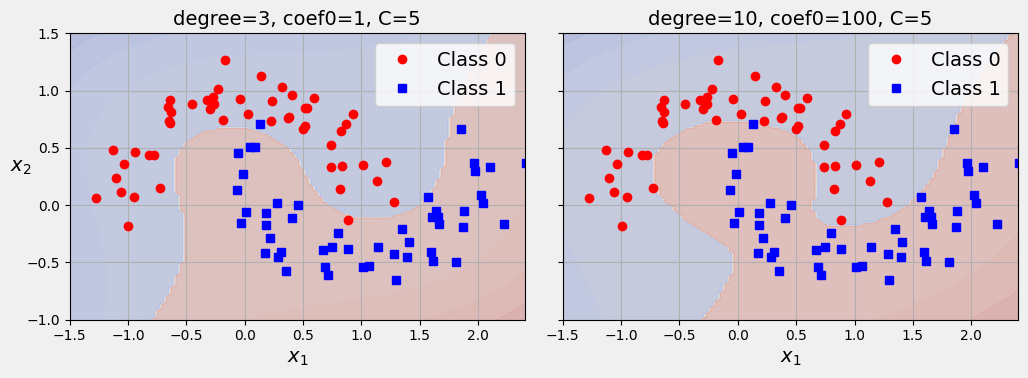

In [180]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial SVM classifier with degree 3
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

# Polynomial SVM classifier with degree 10
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap="coolwarm", alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap="coolwarm", alpha=0.1)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
fig.patch.set_facecolor('#f0f0f0')

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")
axes[0].set_facecolor('#e0e0e0')

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")
axes[1].set_facecolor('#e0e0e0')

plt.tight_layout()
plt.savefig("moons_kernelized_polynomial_svc_plot.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


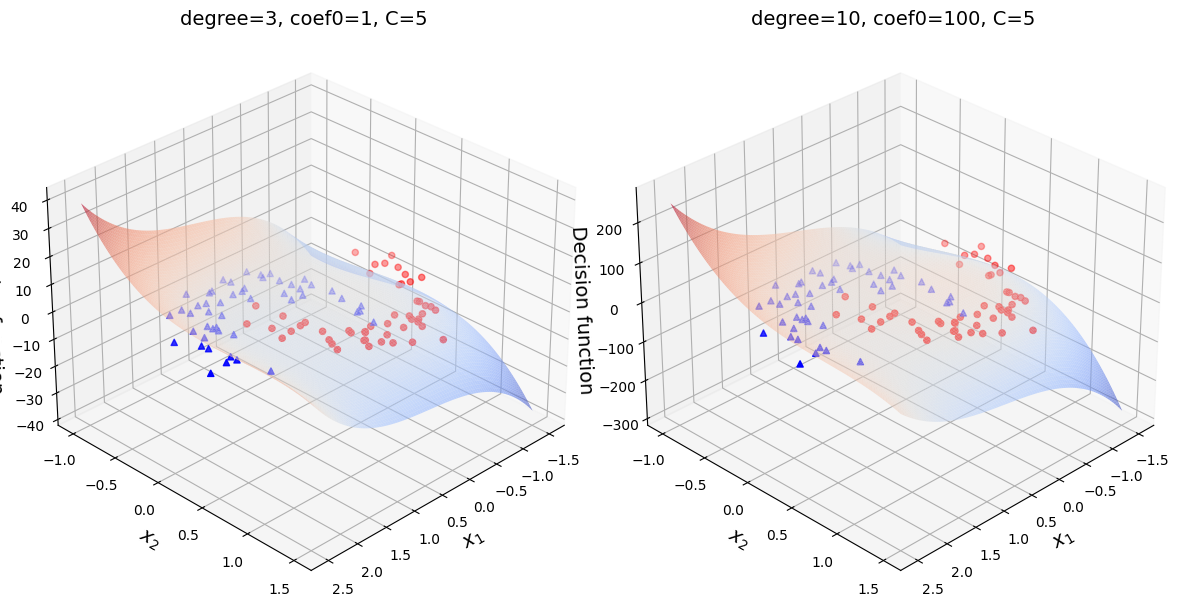

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial SVM classifier with degree 3
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

# Polynomial SVM classifier with degree 10
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

def plot_3d_decision_function(clf, ax, plot_title):
    x0s = np.linspace(-1.5, 2.5, 100)
    x1s = np.linspace(-1, 1.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    ax.plot_surface(x0, x1, y_decision, rstride=1, cstride=1, cmap='coolwarm', alpha=0.6, edgecolor='none')
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], 0, c='r', marker='o')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], 0, c='b', marker='^')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Decision function')
    ax.set_title(plot_title)
    ax.view_init(elev=30, azim=45)  # Adjust the elevation and angle for a better view

fig = plt.figure(figsize=(12, 7))

# Plot degree 3
ax = fig.add_subplot(121, projection='3d')
plot_3d_decision_function(poly_kernel_svm_clf, ax, "degree=3, coef0=1, C=5")

# Plot degree 10
ax = fig.add_subplot(122, projection='3d')
plot_3d_decision_function(poly100_kernel_svm_clf, ax, "degree=10, coef0=100, C=5")

plt.tight_layout()
plt.savefig("moons_kernelized_polynomial_svc_plot_3d.png")
plt.show()


The 3D plots show the decision function surfaces for two polynomial SVM classifiers with different settings. The left plot, with degree 3 and moderate regularization, illustrates a smoother decision boundary, effectively separating the classes. The right plot, with degree 10 and high regularization, demonstrates a more complex and tighter boundary, which captures more intricate patterns but risks overfitting. The red and blue areas indicate the regions where the classifier predicts each class, with the surface height representing the decision function's confidence.

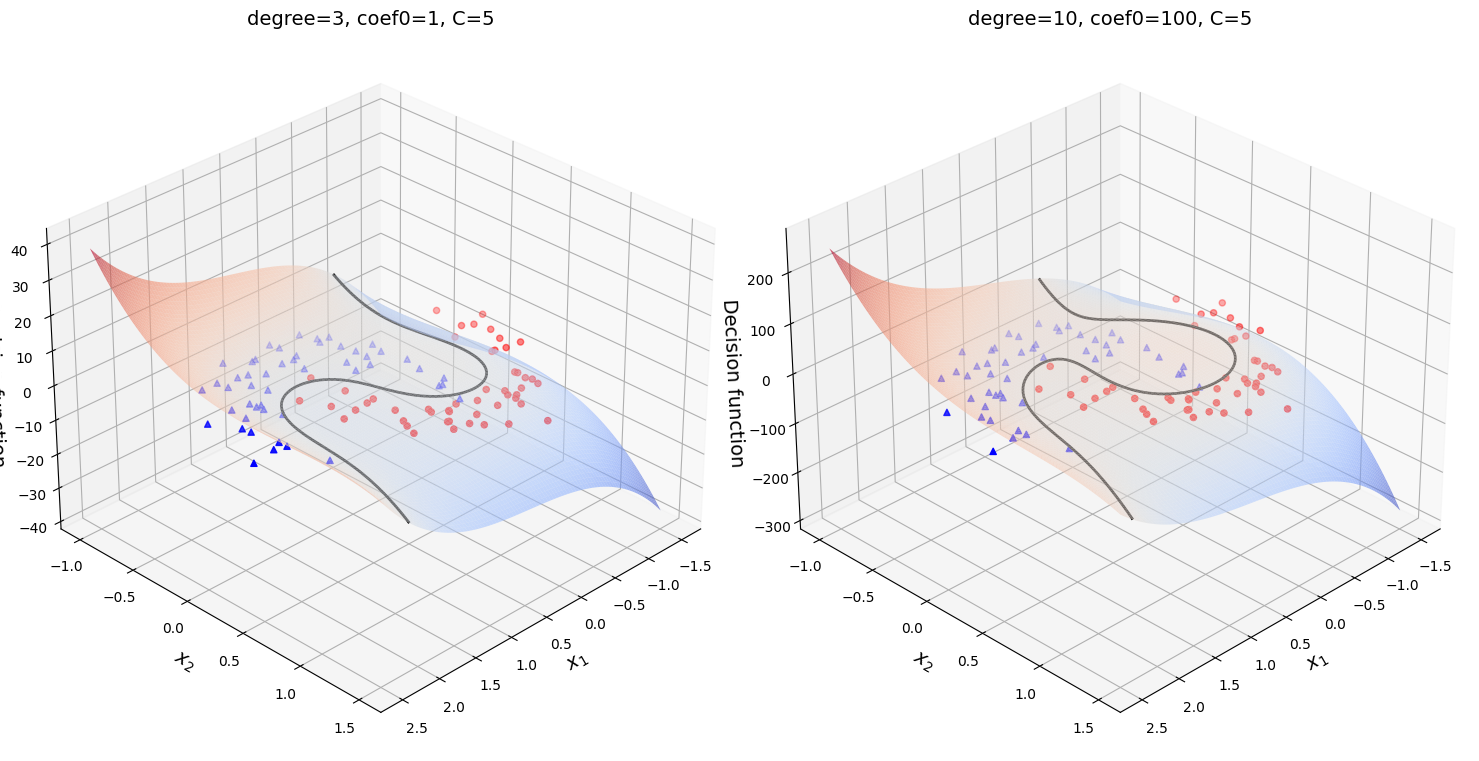

In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Polynomial SVM classifier with degree 3
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

# Polynomial SVM classifier with degree 10
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

def plot_3d_decision_function(clf, ax, plot_title):
    x0s = np.linspace(-1.5, 2.5, 100)
    x1s = np.linspace(-1, 1.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    ax.plot_surface(x0, x1, y_decision, rstride=1, cstride=1, cmap='coolwarm', alpha=0.6, edgecolor='none')
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], 0, c='r', marker='o')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], 0, c='b', marker='^')

    # Plot the decision boundary
    ax.contour(x0, x1, y_decision, levels=[0], linewidths=2, colors='k')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Decision function')
    ax.set_title(plot_title)
    ax.view_init(elev=30, azim=45)  # Adjust the elevation and angle for a better view

fig = plt.figure(figsize=(15, 8))

# Plot degree 3
ax = fig.add_subplot(121, projection='3d')
plot_3d_decision_function(poly_kernel_svm_clf, ax, "degree=3, coef0=1, C=5")

# Plot degree 10
ax = fig.add_subplot(122, projection='3d')
plot_3d_decision_function(poly100_kernel_svm_clf, ax, "degree=10, coef0=100, C=5")

plt.tight_layout()
plt.savefig("moons_kernelized_polynomial_svc_plot_3d_with_boundary.png")
plt.show()


## Similarity Features

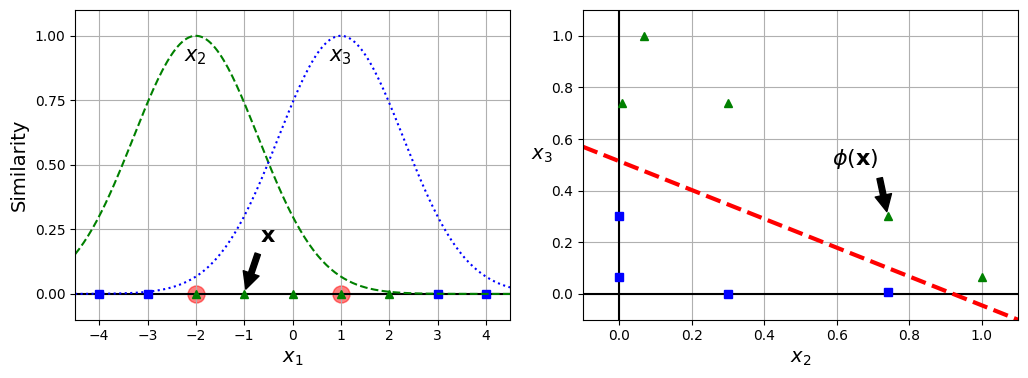

In [183]:
# extra code – this cell generates and saves Figure 5–8

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

## Gaussian RBF Kernel

In [184]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

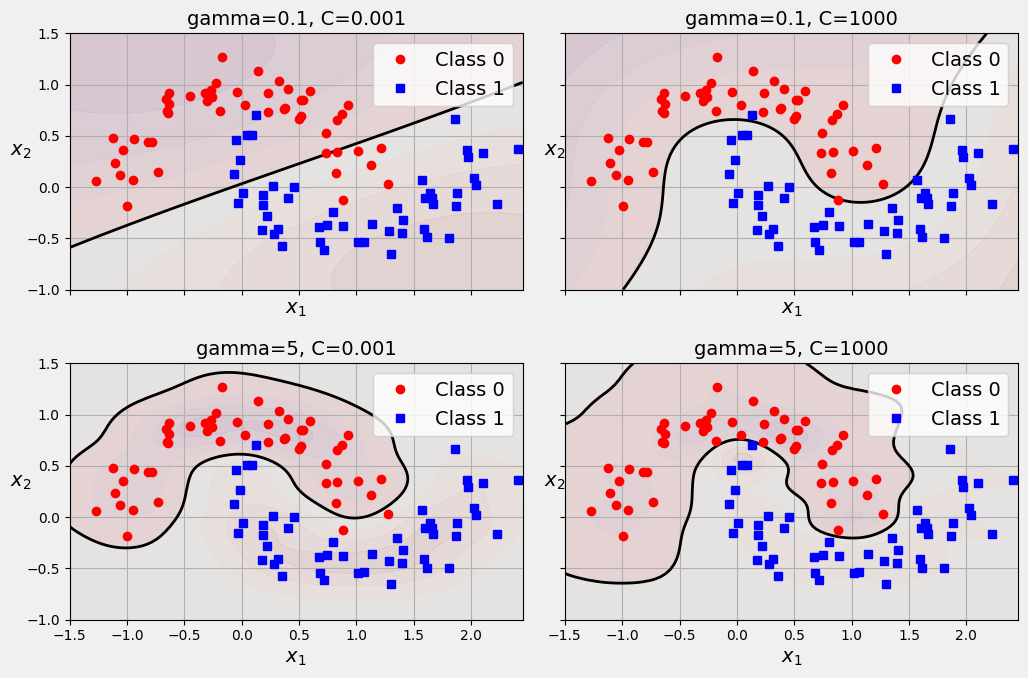

In [185]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# SVM with RBF kernel and various hyperparameters
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Class 1")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap="Pastel1", alpha=0.3)
    plt.contourf(x0, x1, y_decision, cmap="coolwarm", alpha=0.1)
    plt.contour(x0, x1, y_decision, levels=[0], linewidths=2, colors='k')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)
fig.patch.set_facecolor('#f0f0f0')

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    axes[i // 2, i % 2].set_facecolor('#e0e0e0')

plt.tight_layout()
plt.savefig("moons_rbf_svc_plot.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


# SVM Regression

In [186]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

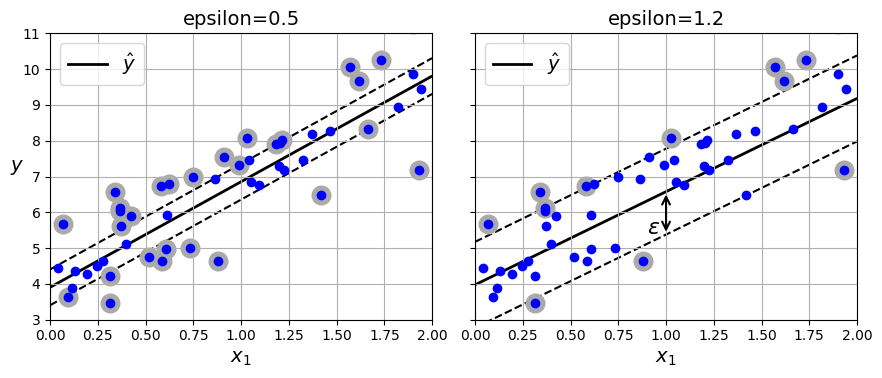

In [187]:
# extra code – this cell generates and saves Figure 5–10

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

In [188]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

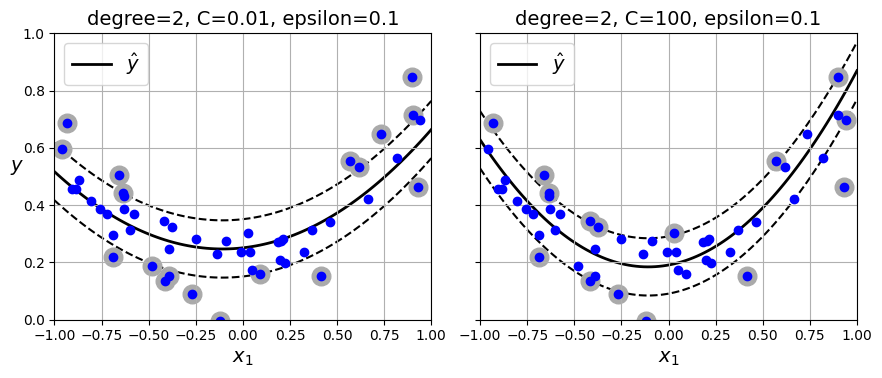

In [189]:
# extra code – this cell generates and saves Figure 5–11

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# Under the hood

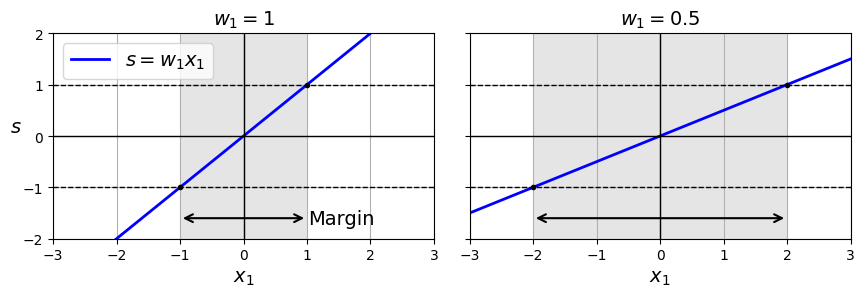

In [190]:
# extra code – this cell generates and saves Figure 5–12

import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()

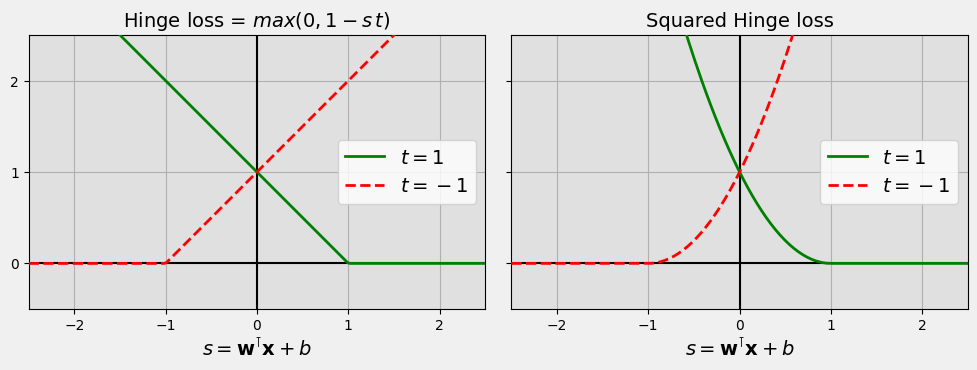

In [191]:
import numpy as np
import matplotlib.pyplot as plt

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
fig.patch.set_facecolor('#f0f0f0')  # background color for the figure

for ax, loss_pos, loss_neg, title in zip(axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")
    ax.set_facecolor('#e0e0e0')  # background color for the axes

plt.tight_layout()
save_fig("hinge_plot")
plt.show()


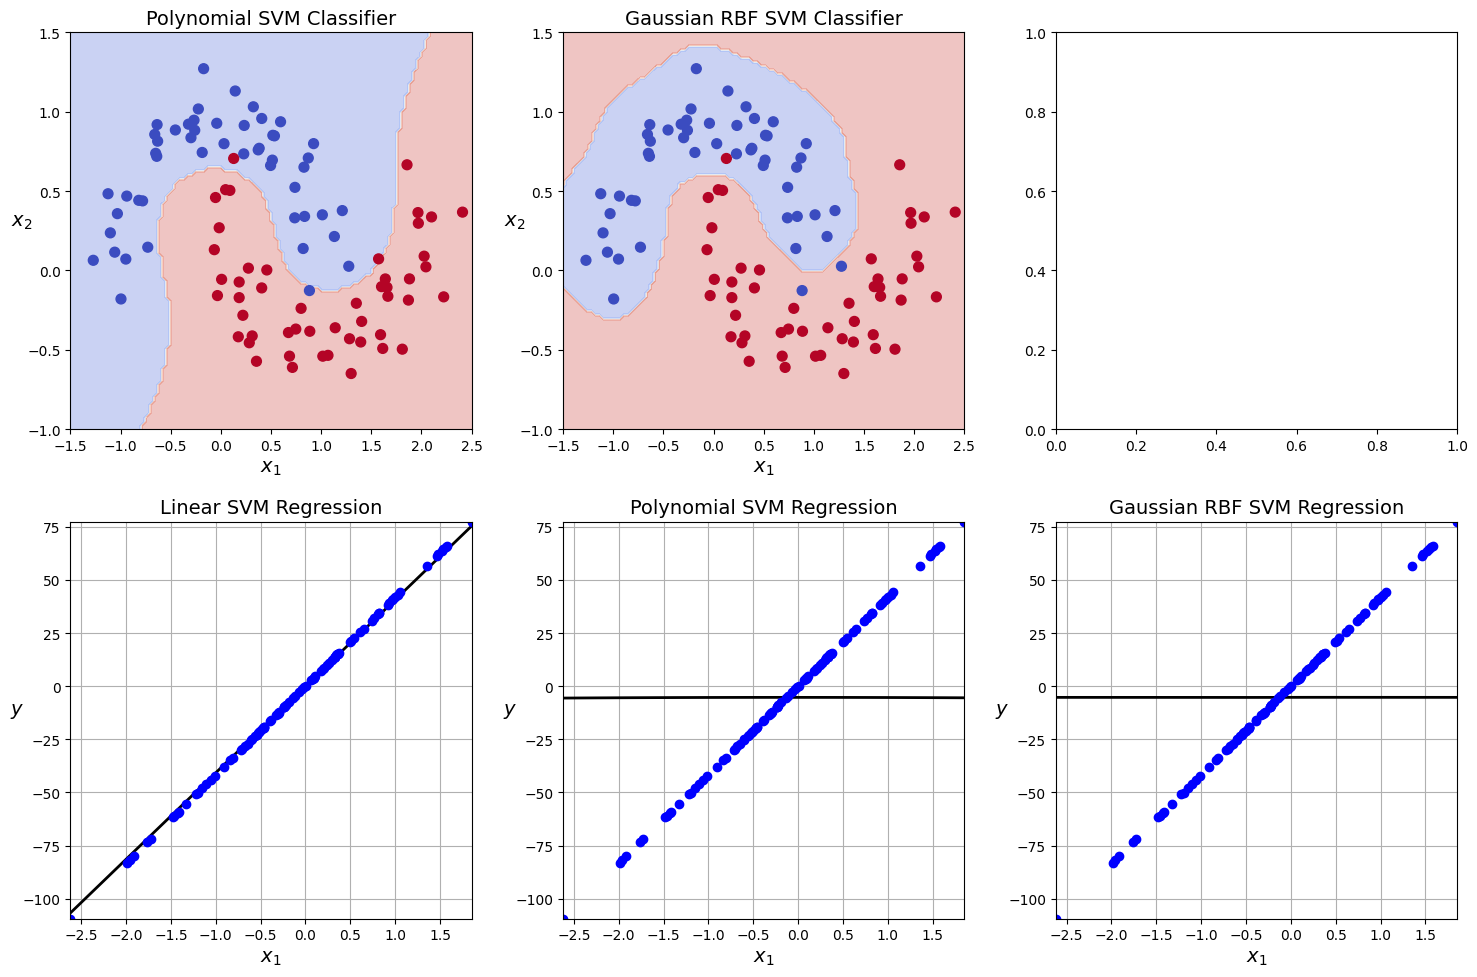

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC, SVR, LinearSVR

# Generate datasets
X_class, y_class = make_moons(n_samples=100, noise=0.15, random_state=42)
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Models for classification
poly_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(kernel="linear", C=10)
)

rbf_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))

# Models for regression
poly_svm_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
rbf_svm_reg = make_pipeline(StandardScaler(), SVR(kernel="rbf", gamma=5, C=0.001))
linear_svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=1.2, random_state=42))

# Train the models
poly_svm_clf.fit(X_class, y_class)
rbf_svm_clf.fit(X_class, y_class)
poly_svm_reg.fit(X_reg, y_reg)
rbf_svm_reg.fit(X_reg, y_reg)
linear_svm_reg.fit(X_reg, y_reg)

# Plot settings
def plot_classification(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, s=50, cmap="coolwarm")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.axis(axes)

def plot_regression(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = clf.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2)
    plt.plot(X_reg, y_reg, "bo")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis(axes)
    plt.grid(True)

# Plotting the models
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

plt.sca(axes[0, 0])
plot_classification(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title("Polynomial SVM Classifier")

plt.sca(axes[0, 1])
plot_classification(rbf_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title("Gaussian RBF SVM Classifier")

plt.sca(axes[1, 0])
plot_regression(linear_svm_reg, [X_reg.min(), X_reg.max(), y_reg.min(), y_reg.max()])
plt.title("Linear SVM Regression")

plt.sca(axes[1, 1])
plot_regression(poly_svm_reg, [X_reg.min(), X_reg.max(), y_reg.min(), y_reg.max()])
plt.title("Polynomial SVM Regression")

plt.sca(axes[1, 2])
plot_regression(rbf_svm_reg, [X_reg.min(), X_reg.max(), y_reg.min(), y_reg.max()])
plt.title("Gaussian RBF SVM Regression")

plt.tight_layout()
plt.show()
